<a href="https://colab.research.google.com/github/zemld/TimeseriesHSE/blob/main/algorithms_research/TFT_with_finance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install u8darts[all]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.3 MB/s eta 0:00:00
   

In [ ]:
!pip uninstall numpy -y
!pip install numpy==1.23.5

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 60.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.42.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
xarray 2025.1.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
pymc 5.21.1 requires nu

In [ ]:
from google.colab import files
import json
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from google.colab import drive
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from typing import Tuple

import torch
import torchmetrics
from darts.models import TFTModel
from darts.utils.likelihood_models import QuantileRegression
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks.lr_monitor import LearningRateMonitor

In [ ]:
uploaded = files.upload()
# Чтение JSON-файла
df = pd.read_json(list(uploaded.keys())[0])

df.head()

Saving sber (1).json to sber (1).json


,date,close,open,low,high,trendclspr,volume,value,numtrades
0,2022-03-28,125.00,130.60,125.00,131.47,-4.94,33212430,4.203875e+09,121793
1,2022-03-29,128.77,126.16,122.00,137.57,3.02,72338740,9.470337e+09,184608
2,2022-03-30,134.60,136.89,131.11,138.40,4.53,35675450,4.754054e+09,102479
3,2022-03-31,143.69,135.25,134.52,147.41,6.75,118425000,1.666945e+10,255603
4,2022-04-01,154.50,145.00,144.51,155.40,7.52,118880720,1.802233e+10,265276


In [ ]:
df.sample(n = 5)

,date,close,open,low,high,trendclspr,volume,value,numtrades
951,2024-11-25,227.81,236.00,227.25,237.10,-3.47,76469770,1.772727e+10,162372
326,2023-03-01,170.53,170.40,169.50,171.66,0.42,53784730,9.167860e+09,114761
385,2023-05-26,248.10,243.45,242.81,249.64,1.78,69202730,1.706429e+10,150126
679,2024-03-14,295.83,298.50,295.14,298.70,-1.01,42205930,1.252406e+10,113580
173,2022-10-17,112.44,107.93,107.65,112.76,4.32,78496550,8.680124e+09,142876


In [ ]:
print("Размер данных: ")
df.shape

Размер данных: 


(1066, 9)

In [ ]:
# На всякий случай сортируем
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

# Добавляем временные признаки
df["dayofweek"] = df["date"].dt.dayofweek
df["day"] = df["date"].dt.day
df["day_of_year"] = df["date"].dt.dayofyear
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

# Если в один день было несколько значений, то берем среднее
df = df.groupby("date", as_index=False).mean()
df = df.dropna()

# Создаём индексы без выходных
full_date_range = pd.date_range(df["date"].min(), df["date"].max(), freq="B")

df = df.set_index("date").reindex(full_date_range)
df = df.reset_index().rename(columns={"index": "date"})

# Линейно интерполируем пропуски, если они вдруг есть
df = df.interpolate()

In [ ]:
ts_target_close = TimeSeries.from_dataframe(
    df,
    time_col="date",
    value_cols=["close"],
    freq="B",   # будние дни
)

# признаки, которые помогают установить взаимосвязи
ts_future_covs_finance = TimeSeries.from_dataframe(
    df,
    time_col="date",
    value_cols=["open"],
    freq="B"
)

In [ ]:
# Нормализуем данные
target_scaler = Scaler(scaler=StandardScaler(), global_fit=True)
ts_target_close_scaled = target_scaler.fit_transform(ts_target_close)

future_scaler = Scaler(scaler=StandardScaler(), global_fit=True)
ts_future_covs_scaled = future_scaler.fit_transform(ts_future_covs_finance)

In [ ]:
ts_temporal_features = TimeSeries.from_dataframe(
    df,
    time_col="date",
    value_cols=["day", "dayofweek", "day_of_year", "month"],
    freq="B"
)

ts_all_covs = ts_future_covs_scaled.stack(ts_temporal_features)

In [ ]:
def encode_year(idx):
    return (idx.year - 2022) / (2025 - 2022)

encoders = {
    "cyclic": {
        "future": ["day", "day_of_year", "dayofweek", "month"]
    },
    "custom": {
        "future": [encode_year]
    },
}

In [ ]:
n = len(ts_target_close_scaled)
train_size = int(0.7 * n)
val_size   = int(0.15 * n)

train_end = ts_target_close_scaled.time_index[train_size - 1]
val_end = ts_target_close_scaled.time_index[train_size + val_size - 1]

def series_splitter(series):
    train = series.drop_after(train_end)
    val   = series.slice(train_end, val_end)
    test  = series.drop_before(val_end)
    return train, val, test

ts_target_train, ts_target_val, ts_target_test = series_splitter(ts_target_close_scaled)
ts_covs_train, ts_covs_val, ts_covs_test  = series_splitter(ts_future_covs_scaled)

In [ ]:
early_stopper = EarlyStopping(
    monitor="val_loss",
    patience=30,
    mode="min"
)

In [ ]:
input_chunk = 50 # Размер окна
output_chunk = 50 # Размер прогноза

In [ ]:
tft_finance = TFTModel(
    input_chunk_length=input_chunk,
    output_chunk_length=output_chunk,

    batch_size=64,
    n_epochs=50,
    random_state=42,

    hidden_size=64,
    lstm_layers=2,
    num_attention_heads=4,
    hidden_continuous_size=16,

    likelihood=QuantileRegression([0.1, 0.5, 0.9]),


    torch_metrics=torchmetrics.MeanAbsoluteError(),

    add_encoders=encoders,
    use_static_covariates=True,

    optimizer_cls=torch.optim.Adam,
    optimizer_kwargs={"lr": 1e-3},

    pl_trainer_kwargs={
        "accelerator": "gpu",  # Используем GPU, чтобы быстрее прогнозировалось
        "devices": [0],
        "log_every_n_steps": 10,
        "enable_checkpointing": True,
        "enable_model_summary": True,
        # "callbacks": [early_stopper]
    }
)

In [ ]:
tft_finance.fit(
    series=ts_target_train,
    future_covariates=ts_covs_train,
    val_series=ts_target_val,
    val_future_covariates=ts_covs_val
)

INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /content/checkpoints exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
   | Name                              | Type                             | Params | Mode 
------------------------------------------------------------------------------------------------
0  | train_metrics                     | MetricCollection                 | 0      | train
1  | val_

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/pytorch_lightning/core/module.py:512: You called `self.log('val_MeanAbsoluteError', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/pytorch_lightning/core/module.py:512: You called `self.log('train_MeanAbsoluteError', ..., logger=True)` but have no logger configured. You can enable one by doing `Trainer(logger=ALogger(...))`


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.


TFTModel(output_chunk_shift=0, hidden_size=64, lstm_layers=2, num_attention_heads=4, full_attention=False, feed_forward=GatedResidualNetwork, dropout=0.1, hidden_continuous_size=16, categorical_embedding_sizes=None, add_relative_index=False, loss_fn=None, likelihood=QuantileRegression(quantiles: Optional[list[float]] = None), norm_type=LayerNorm, use_static_covariates=True, input_chunk_length=50, output_chunk_length=50, batch_size=64, n_epochs=50, random_state=42, torch_metrics=MeanAbsoluteError(), add_encoders={'cyclic': {'future': ['day', 'day_of_year', 'dayofweek', 'month']}, 'custom': {'future': [<function encode_year at 0x7d90dd96aca0>]}}, optimizer_cls=<class 'torch.optim.adam.Adam'>, optimizer_kwargs={'lr': 0.001}, pl_trainer_kwargs={'accelerator': 'gpu', 'devices': [0], 'log_every_n_steps': 10, 'enable_checkpointing': True, 'enable_model_summary': True})

In [ ]:
n_forecast = 50

In [ ]:
predict_start = ts_target_test.time_index[-(input_chunk + n_forecast)]

input_series = ts_target_test.slice(
    start_ts=predict_start,
    end_ts=predict_start + pd.offsets.BDay(input_chunk - 1)
)

input_series.to_dataframe()


covariates_for_prediction = ts_covs_test.slice(
    start_ts=predict_start,
    end_ts=predict_start + pd.offsets.BDay(input_chunk + n_forecast - 1)
)

tft_preds_scaled = tft_finance.predict(
    n=n_forecast,
    series=input_series,
    future_covariates=covariates_for_prediction,
    verbose=True,
)

# Возвращаем ряды в исходный вид
tft_preds = target_scaler.inverse_transform(tft_preds_scaled)

actual_unscaled = target_scaler.inverse_transform(
    ts_target_test.slice(
        start_ts=predict_start + pd.offsets.BDay(input_chunk + n_forecast - 50),
        end_ts=predict_start + pd.offsets.BDay(input_chunk + n_forecast - 1)
    )
)

INFO:pytorch_lightning.utilities.rank_zero:You are using the plain ModelCheckpoint callback. Consider using LitModelCheckpoint which with seamless uploading to Model registry.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

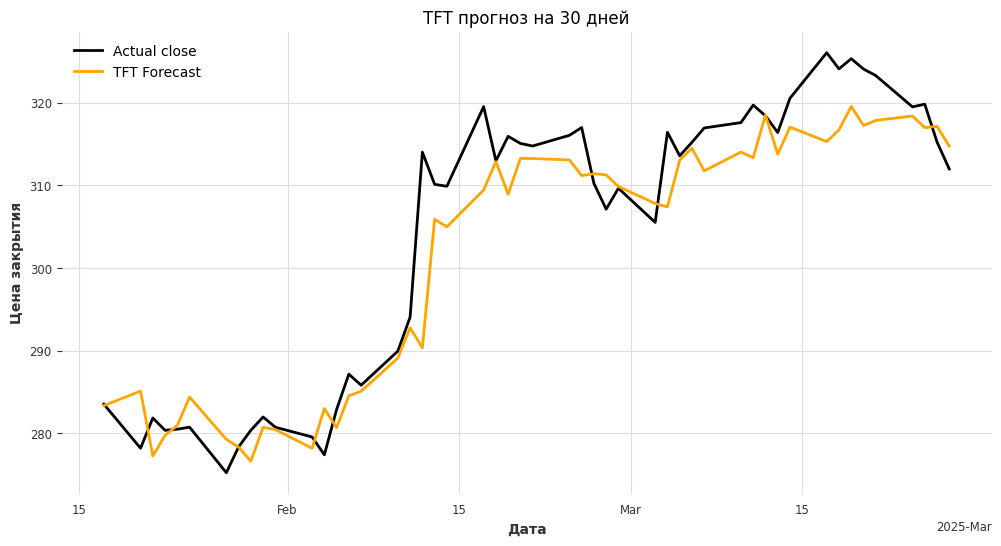

In [ ]:
plt.figure(figsize=(12, 6))
actual_unscaled.plot(label="Actual close")
tft_preds.plot(label="TFT Forecast", color='orange')

plt.title("TFT прогноз на 30 дней")
plt.legend()
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_true = actual_unscaled.values().flatten()
y_pred = tft_preds.values().flatten()
# Метрики
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"MAPE = {mape:.2f}%")

MAE  = 3.7321
RMSE = 5.4193
MAPE = 1.21%
